# **Regression with TensorFlow**

In [63]:
!pip install opendatasets

In [64]:
import pandas as pd # Work to data set
import matplotlib.pyplot as plt # Data visualisation
import tensorflow as tf # Build nuralnetwork
import opendatasets as od #Using Kaggel data set dawnload

In [65]:
#Download dataset
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [66]:
# Load Data
data = pd.read_csv("/content/random-linear-regression/test.csv")

In [67]:
# Show first 5 data
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [68]:
# Shap in data set
data.shape

(300, 2)

In [69]:
# Define X and Y
X = data["x"]
y = data["y"]

In [70]:
# X values
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [71]:
# Y values
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


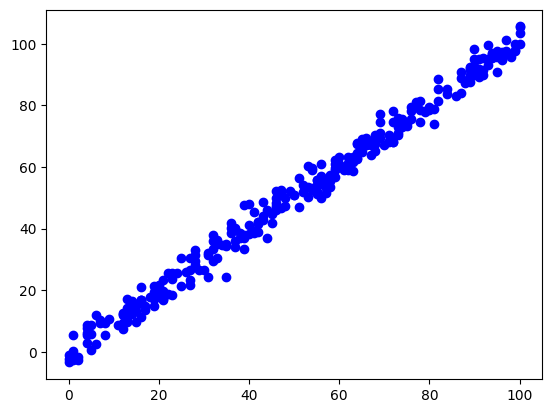

In [72]:
# Visualisacion using mathlib
plt.scatter(X, y, c='b') #  c='b --> color is blue
plt.show()

In [73]:
# Tran and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# X train and test shape
X_train.shape, X_test.shape

((240,), (60,))

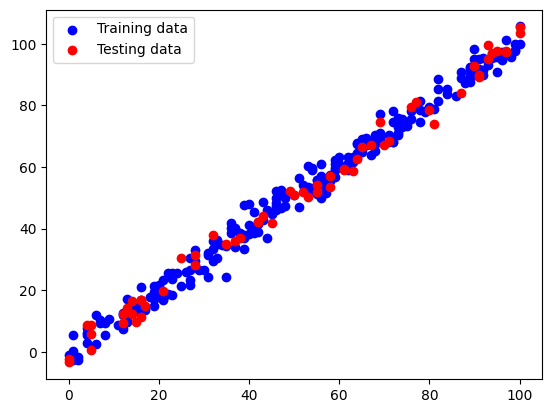

In [75]:
# visualisation train and test data
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='r', label="Testing data")
plt.legend()
plt.show()

# Model Building using Nural network

In [90]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),  # Hidden layer with 64 units(Nuron), input shape of (1,) --> 1st Layer
    tf.keras.layers.Dense(10),  # Add Hidden layer with 10 units (Nuron) --> 2nd Layer
    tf.keras.layers.Dense(1)  # Output layer with 1 unit(Nuron)
])  # Dense is fully connected layer


#Compile model
model.compile(loss=tf.keras.losses.mae, #Mean Abosulate Error(Loss function)
              # optimizer = tf.keras.optimizers.SGD(),# SGD --> Stochastic Gradient Descent Optimizer
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              metrics=["mae"])

# Train Model
epoch_number = 10 # 4 Epoch_number
history = model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs = epoch_number) # 2 dementional

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 36.0176 - mae: 36.0176
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.1794 - mae: 16.1794  
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8845 - mae: 9.8845   
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5936 - mae: 9.5936 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3306 - mae: 4.3306 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7629 - mae: 3.7629 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9328 - mae: 2.9328 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5482 - mae: 3.5482 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8153 - mae: 2.8153 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9144 - mae: 2.9144 


In [91]:
# Model Architector Summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [92]:
# Model Predict
y_predictions = model.predict(X_test)
y_predictions[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[89.01594 ],
       [75.17172 ],
       [92.97142 ],
       [ 4.961841],
       [90.00481 ]], dtype=float32)

In [93]:
# Atual values
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


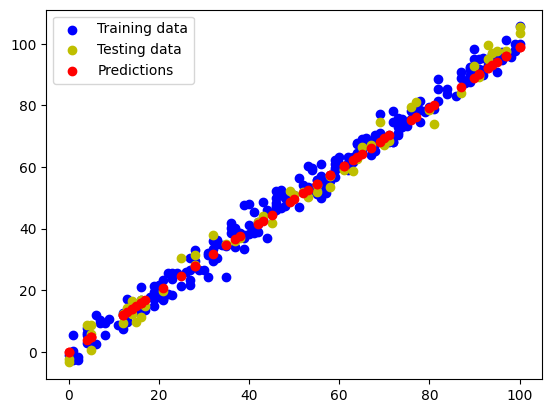

In [94]:
# Visualization

plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='y', label="Testing data")
plt.scatter(X_test, y_predictions, c='r', label="Predictions")
plt.legend()
plt.show()

### Model Evaluate

In [95]:
# Evaluate Model
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6985 - mae: 2.6985 


[2.571284770965576, 2.571284770965576]

### Determind Propomance

Using MAE (Mean Absolute Error)

In [96]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predictions))
mae = mae_metric.result().numpy()
print("MAE:", mae)


MAE: 2.571285


In [97]:
# y_preductionn sheap
y_predictions.shape

(60, 1)

In [98]:
# Y_test shape
y_test.shape

(60,)

In [99]:
# Removes dimensions of size 1 from y_predictions (e.g., shape (N, 1) → (N,))
# Then prints or returns the shape of the squeezed tensor
tf.squeeze(y_predictions).shape

TensorShape([60])

Using MSE (Mean Squared error)

In [100]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_predictions))
mse = mse_metric.result().numpy()
print("MSE:", mse)

MSE: 10.244082


**History**

In [101]:
history.history

{'loss': [26.27655029296875,
  12.641220092773438,
  9.693897247314453,
  8.699121475219727,
  4.477659702301025,
  3.511658191680908,
  2.899678945541382,
  3.6902761459350586,
  2.812542200088501,
  2.9321250915527344],
 'mae': [26.27655029296875,
  12.641220092773438,
  9.693897247314453,
  8.699121475219727,
  4.477659702301025,
  3.511658191680908,
  2.899678945541382,
  3.6902761459350586,
  2.812542200088501,
  2.9321250915527344]}

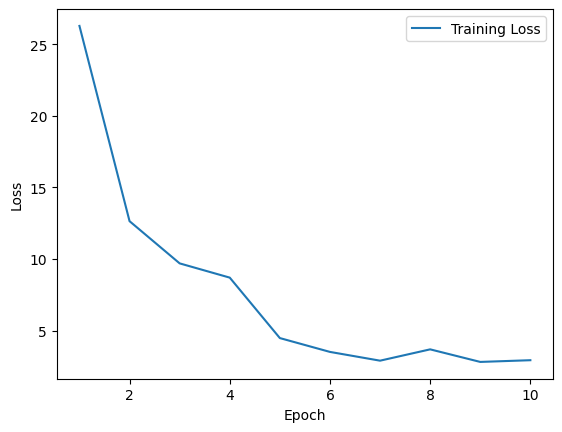

In [102]:
# History Visualization

x_range = range(1, epoch_number+1)
loss = history.history['loss']

plt.plot(x_range, loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Look at Weight Values and Biases Values

In [106]:
for layer in model.layers:
  weights = layer.get_weights()
  biases = layer.get_weights()
  print(f"\nWeights: \n{weights}\nBiases: \n{biases}")



Weights: 
[array([[ 1.3664496e-02,  5.3972858e-03, -1.6975093e-03, -2.6092813e-03,
        -3.5895252e-01, -9.8994561e-03,  3.0776586e-03, -3.8203958e-04,
         7.4866186e-03, -5.7416079e-03,  6.7971468e-02, -5.5221811e-02,
        -1.9287784e-03,  2.2561252e-01, -1.0236282e-01, -6.8430297e-02,
        -6.9332332e-03,  5.8178827e-03,  1.5416330e-01,  6.3343853e-04,
        -1.9070837e-03,  7.5296583e-03, -2.8538084e-02, -1.6404215e-01,
         1.5159844e-02,  1.5621537e-01,  2.9974210e-01, -2.1038098e-02,
         1.9276045e-02, -2.9066096e-03, -6.2100601e-04,  4.3054330e-03,
         4.5859138e-03, -3.5490058e-03,  2.9628766e-01,  8.8682026e-02,
        -1.2983342e-01, -1.0177290e-01, -2.9816583e-01,  3.1963103e-03,
         7.3387306e-03,  8.7651135e-03,  1.5858926e-02, -4.8654461e-03,
         3.8118972e-03,  5.1730275e-03,  3.9073870e-02,  1.8811788e-01,
         4.4440083e-02, -3.5720182e-04, -3.0208742e-02,  1.1270725e-01,
        -3.1577302e-03, -5.3251754e-03, -1.5378134e-